# Тема: "Подготовка и проведение А/Б тестирования, анализ результатов на базе интернет-магазина"

Краткое описание.

Крупный интернет -магазин поставил задачу отделу маркетинга и аналитики подготовить список гипотез, направленных на увеличение выручки магазина, запустить А/Б тестирование и проанализировать результаты.


Цель проекта: приоретизация гипотез, проведение А/Б тестирования, анализ результатов.

Задачи проекта:

    Проведение приоритизации гипотез.
    Проведение А/Б тестирования.
    Анализ результатов.
 

План (декомпозиция) проекта:

    Изучение предоставленных данных по гипотезам.
    Применение фреймворков ICE, RICE  для приоритизации гипотез.
    Анализ результатов приоритизации.
    Изучение предоставленных данных по А/Б тестированию.
    Построение графика кумулятивной выручки по группам. 
    Построение графика кумулятивного среднего чека по группам.
    Построение графика относительного изменения кумулятивного среднего чека по группам.
    Построение графика кумулятивного среднего количества заказов на посетителя по группам.
    Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
    Построение точечного графика количества заказов по пользователям.
    Расчет 95-го и 99-го перцентилей количества заказов на пользователя.
    Построение точечного графика стоимости заказов.
    Расчет 95-го и 99-го перцентилей стоимости заказов.
    Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
    Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.
    Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 
    Принятие решений по результатам тестирования.
    Написание выводов.
    
    




### Изучение предоставленных данных по гипотезам.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters() 

Изучим датафрейм data_hypothesis.

In [2]:
data_hypothesis = pd.read_csv('C:\datasets\hypothesis.csv')

Структура данных data_hypothesis:

1. Hypothesis — краткое описание гипотезы;
2. Reach — охват пользователей по 10-балльной шкале;
3. Impact — влияние на пользователей по 10-балльной шкале;
4. Confidence — уверенность в гипотезе по 10-балльной шкале;
5. Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [3]:
data_hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Приведем названия колонок к общепринятым правилам в Питоне.

In [4]:
data_hypothesis.columns = data_hypothesis.columns.str.lower().str.replace(' ', '_')

Проверим изменения.

In [5]:
data_hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Датасет содержит 9 строк не нулевых строк. Типы данных соответствуют содержанию.

In [6]:
data_hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Проверим датафрейм на дубликаты.

In [7]:
data_hypothesis.duplicated().sum()

0

Посмотрим на гипотезы, которые предстоит приоритизировать.

In [8]:
pd.options.display.max_colwidth = 150
data_hypothesis.hypothesis

0              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1                                       Запустить собственную службу доставки, что сократит срок доставки заказов
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3             Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4                                Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5                        Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
7                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8                                                         Запустить акцию, дающую скидку


### Приоритизация гипотез
Применение фреймворка ICE

ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота»)

In [9]:
# расчтаем по формуле (impact * confidense)/efforts 
data_hypothesis['ice_score'] = round((data_hypothesis['impact'] * data_hypothesis['confidence']) / data_hypothesis['efforts'],2)
# выведем название гипотезы, остортиорованные по убываню ice_score
data_hypothesis[['hypothesis', 'ice_score']].sort_values(by='ice_score', ascending=False)


,hypothesis,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00



8 гипотеза набрала больше баллов по ICE  - "Запустить акцию, дающую скидку на товар в день рождения"

Посмотрим на гипотезу №8 в датафрейме data_hypothesis.

In [10]:
data_hypothesis.sort_values(by='ice_score', ascending=False)  

,hypothesis,reach,impact,confidence,efforts,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Запустить акцию, дающую скидку на товар в день рождения:

   оценка impact и confidence имеет почти максимальные показатели. Эти показатели  отвечают за то насколько изменения повлияет на удвлетворение от продукта и насколько можно быть уверены в этом. 
    компонет efforts - отвечает за стоимость проведения акции. Оценка этого показателя средняя. Можно организовать рекламную рассылку или добавить  баннер на сайт, сообщающий об акции. 


Применение фреймворка RICE

RICE (R от англ. reach, «охват»)

In [11]:
data_hypothesis['rice_score'] = data_hypothesis['ice_score']* data_hypothesis['reach'] 
data_hypothesis[['hypothesis', 'rice_score']].sort_values(by='rice_score', ascending=False)   

,hypothesis,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",39.99
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8.96
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3.99
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


Данные изменились. После добавлением охвата пользователей гипотеза№7 вышла вперед, а предыдущий лидер по ICE гипотеза№8 ушла на 5 место. Это можно объяснить тем, что акция на день рождения это приятно, но приятно только раз в год. Востользоваться ей основной поток ежедневных покупателей не сможет. 


Посмотрим на гипотезу №7 в датафрейме data_hypothesis.

In [12]:
data_hypothesis.sort_values(by='rice_score', ascending=False)  

,hypothesis,reach,impact,confidence,efforts,ice_score,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,39.99
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,8.96
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,3.99
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00




 Гипотеза№ 7 имеет хорошие больные оценки - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", для неё:

    reach - 10 баллов. Добавление подписки на основные страницы, позволит собрать качественную базу клиентов.
    impact - 7 баллов. Добавление формы подписки повышает персональную вовлеченность покупателя и, соответственно, оказывает влияние на поведение как покупателя так и на бизнес, который становиться более важен для покупателя.
    сonfidence - 8 баллов. Подписка современный и персонализирующий вариант взаимодействия бизнеса и покупателя.
    efforts - 5 баллов. средняя оценка, добавление небольшой формы на сайт не вызовет больших затрат.



По итогам приоритизации методами ICE и RICE пожно сделать вывод о том, что гипотеза, охватывающая больший круг пользователей посчитана методом RICE, имеющая самые большие бальные оценки: гипотеза №7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". 
По моему мнению, для крупного интернет -магазина важнее делать акции и развивать бизнес в сторону большего охвата  и вовлечения покупаталей, именно поэтому я выберу для проведения А/Б тестирования гипотезу№7.




### Изучение предоставленных данных по А/Б тестированию.

In [13]:
# чтение файла с данными и сохранение в orders
orders = pd.read_csv("C://datasets//orders.csv")
# чтение файла с данными и сохранение в visitors
visitors = pd.read_csv("C://datasets//visitors.csv")

Рассмотрим датасет orders с информацией о совершенных заказах.

Структура данных orders:

    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ. гипотезы.

In [14]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Датасет содержит 1197 не нулевых значений. Есть несоответствия формата некоторых данных их содержанию.

Рассмотрим датасет visitors с информацией о посещениях.

Структура данных visitors:

1. date — дата;
2. group — группа A/B-теста;
3. visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

In [16]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Датасет содержит 62  не нулевых значений. Есть несоответствия формата некоторых данных их содержанию.

Исправим несоответсвия сразу в 2 датасетах.

In [18]:
#приведём к нижнему регистру и добавим нужнее подчёркивание для удобства чтения
orders.columns = orders.columns.str.replace('Id', '_id') 
#приведём столбцы с датой к типу datetime
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d') #перевод в дату
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d') #перевод в дату

Проверим изменения.

In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [20]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверим данные 2 датафреймов на дубликаты.

In [21]:
orders.duplicated().sum()

0

In [22]:
visitors.duplicated().sum()

0

Проверим данные 2 датафреймов на пропуски.

In [23]:
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [24]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Проверяем корректность разделения пользователей по группам.

In [25]:
# отбираем группы из данных с заказами 
group_a=orders.query('group == "A"') 
group_b=orders.query('group == "B"') 
  
# получаем id пользователей, попавших в обе группы 
group_intersections=list(np.intersect1d(group_a['visitor_id'], group_b['visitor_id']))
len(group_intersections)

58

58 пользователей попали в обе группы. Это может исказить выводы дальнейшего исследования. Удалим их.

In [26]:
orders = orders.query('visitor_id not in @group_intersections')

Проверим, что в данных не осталось записей о пользователях попавших в обе группы

In [27]:
# отбираем группы из данных с заказами 
group_a=orders.query('group == "A"') 
group_b=orders.query('group == "B"') 
  
# получаем пользователей, попавших в обе группы 
group_intersections=list(np.intersect1d(group_a['visitor_id'], group_b['visitor_id']))
len(group_intersections)

0

In [28]:
print('\nНачальная дата {}, конечная дата {}\n'.format(visitors['date'].min(), visitors['date'].max()))


Начальная дата 2019-08-01 00:00:00, конечная дата 2019-08-31 00:00:00



Определим сколько у нас групп в А/В тесте.

In [29]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

В А/В тесте 2 группы.

In [30]:
d=orders.groupby('group').agg({'visitor_id': 'nunique'})

In [31]:
d['%']= round((d/orders['visitor_id'].nunique()*100),2)
d

,visitor_id,%
group,,
A,445,45.73
B,528,54.27


Тест не польностью сбалансирован по числу пользователей. Пользователей группы В больше не 8%.

Предобработка данных завершеня, приступим к анализу результатов А/Б тестирования.

### Анализ данных по А/Б тестированию.

Построение графика кумулятивной выручки по группам

Для начала создадим датафреймы с уникальными агрегироваными кумулятивными данными по каждый таблице:

In [32]:
#создаем массив уникальных пар значений дат и групп теста
dt_groups = orders[['date', 'group']].drop_duplicates()  

#получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dt_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg({
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = dt_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({
        'date': 'max',
        'group': 'max', 
        'visitors': 'sum'
    }
    ),
    axis=1,
).sort_values(by=['date', 'group']) 

#выведем полученные таблицы на экран
display(orders_aggregated.head()) 
print('')
display(visitors_aggregated.head())  

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединим полученные таблицы:

In [33]:
#объединям полученные таблицы по дате и группе 
cumulative_df = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
#переименум столбцы 
cumulative_df.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
] 
#выведем полученную таблицу
cumulative_df.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Построим графики:

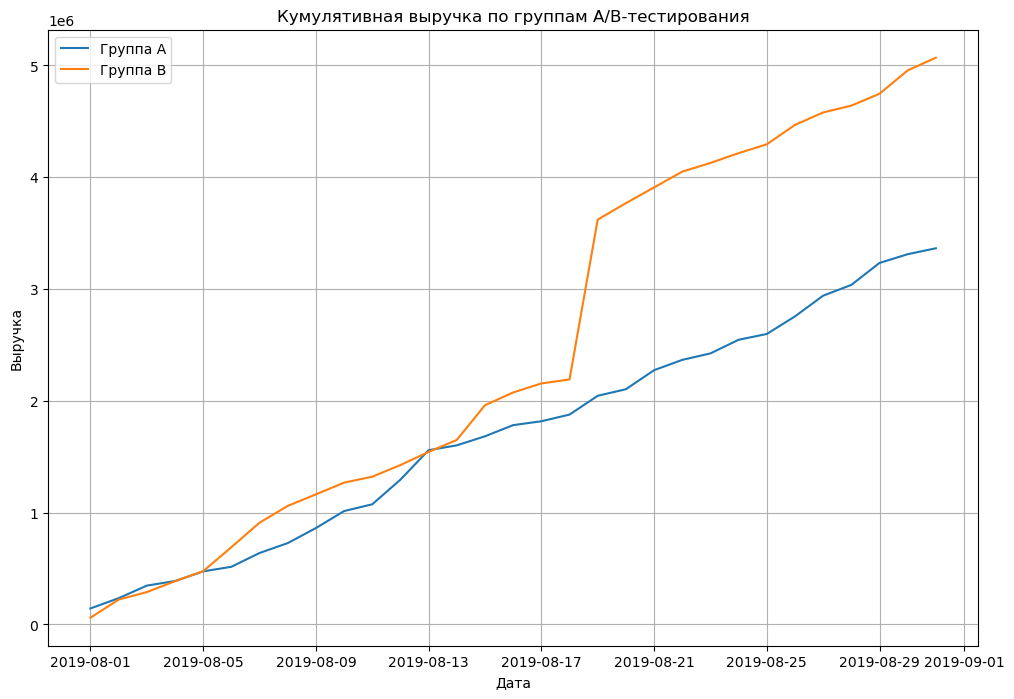

In [34]:
#зададим размеры графика 
plt.figure(figsize=(12,8))  

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_df[cumulative_df['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_df[cumulative_df['group']=='B'][['date','revenue', 'orders']]

# строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

# зададим описание графика
plt.legend(['Группа А', 'Группа B']) 
plt.xlabel('Дата')
plt.ylabel('Выручка') 
plt.title('Кумулятивная выручка по группам A/B-тестирования')
plt.grid()
plt.show() 



На графике видно, что группа В лидирует во всем периоде исследования. По группе В произошёл резкий рост в период с 18 на 19 августа. Причинами могут бить наличие аномальных дорогих заказов или большого количества мелких.

Посмотрим внимательнее на группу В и сделаем отдельно графики по ней для анализа резкого скачка.

Выведем графики для группы B с изменение кол-ва заказов и выручки:

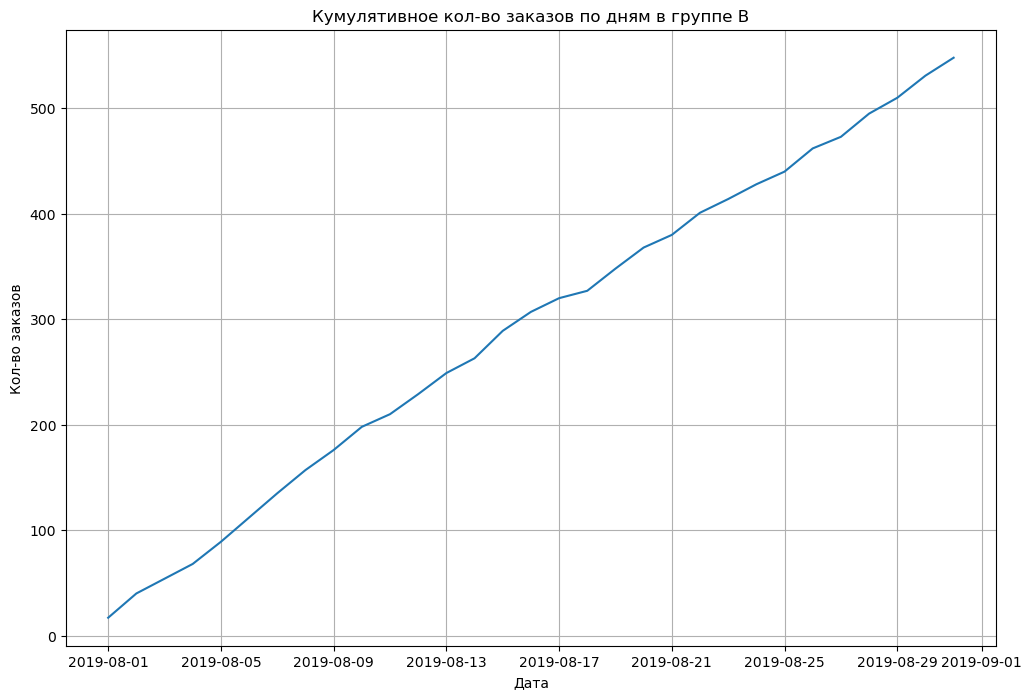

In [35]:
#зададим размеры графика 
plt.figure(figsize=(12,8)) 
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['orders'])  
# зададим описание графика
plt.xlabel('Дата')
plt.ylabel('Кол-во заказов') 
plt.title('Кумулятивное кол-во заказов по дням в группе B')
plt.grid()
plt.show() 

Кумулятивное количество заказов без резких скачков.  изучим график с выручкой:

Изучим график с выручкой.

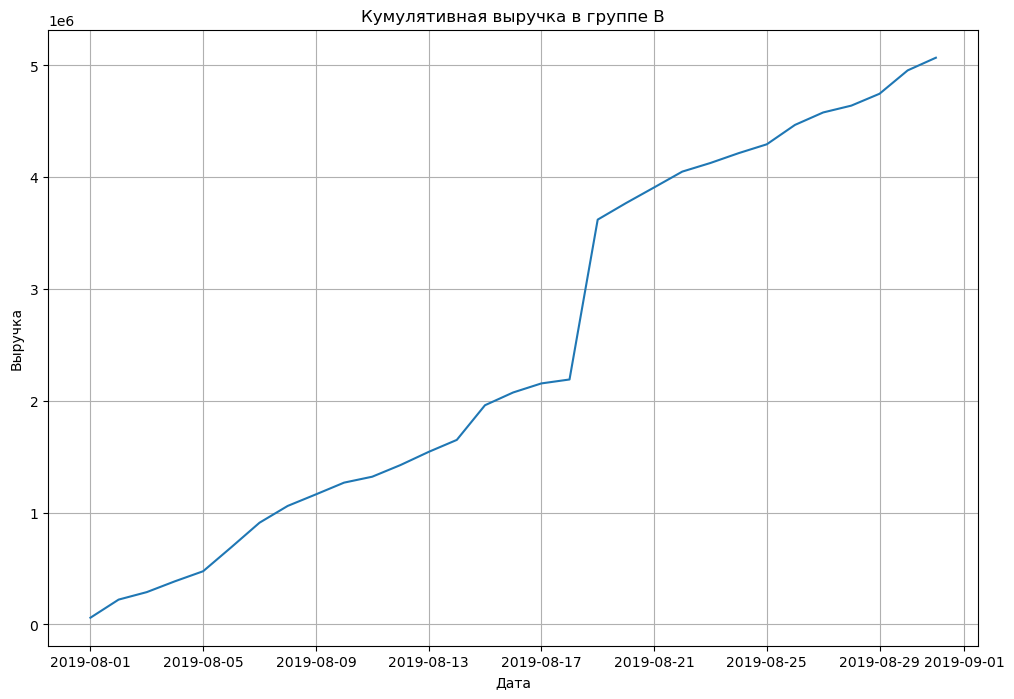

In [36]:
#зададим размеры графика 
plt.figure(figsize=(12,8)) 
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'])  
# зададим описание графика
plt.xlabel('Дата')
plt.ylabel('Выручка') 
plt.title('Кумулятивная выручка в группе B')
plt.grid()
plt.show() 

Резкий скачок роста на графике с выручкой: в группу попал анамально большой заказ.


Построение графика кумулятивного среднего чека по группам

Разделим кумулятивную выручку на кумулятивное число заказов:

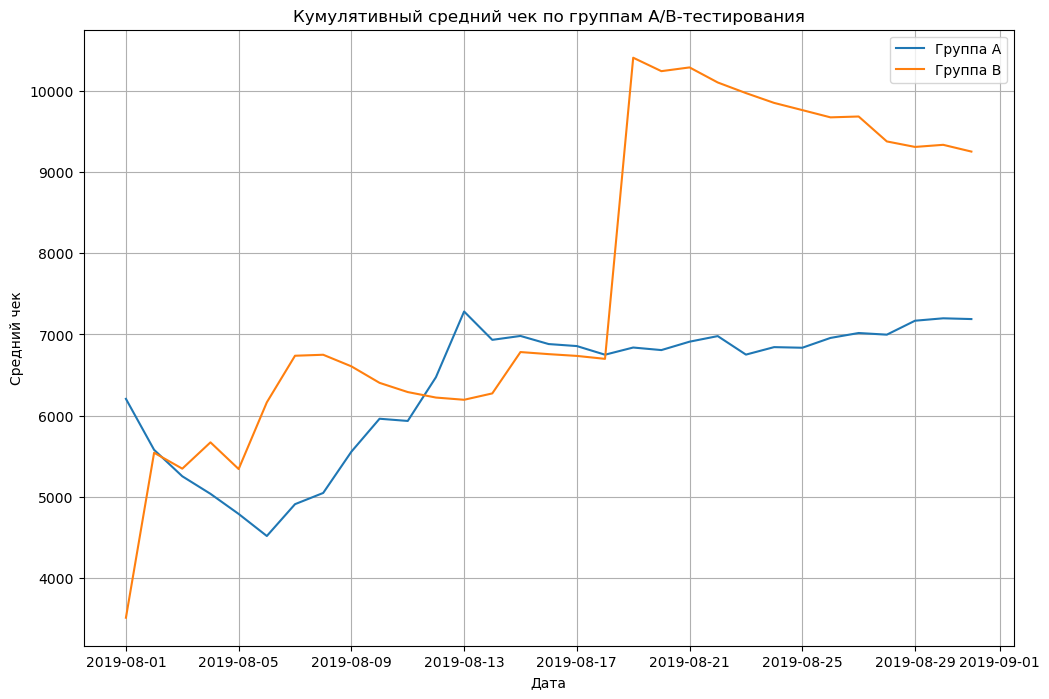

In [37]:
#зададим размеры графика  
plt.figure(figsize=(12,8))   

#построим графики, что бы получить средний чек, разделим выручку на число заказов
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.legend()  

# зададим описание графика
plt.legend(['Группа А', 'Группа B']) 
plt.xlabel('Дата')
plt.ylabel('Средний чек') 
plt.title('Кумулятивный средний чек по группам A/B-тестирования')
plt.grid()
plt.show()  

В начале теста графики ведут себя не стабильно, есть резкие скачки и провалы. На графике среднего чека анамальное значения для группе B в период с 08.17 по 08.21. В конце периода коммулятивный средний чек группы B, выше, чем у А, но там  были анамальные значения.  К концу периода у группы А есть тенденция к росту, а у B к снижению.

Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

Для этого соберем данные в одном датафрейме:

In [38]:
#объеденим по столбцу с датой и зададим суффиксы для каждый группы 
merged_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, 
    left_on='date', right_on='date', 
    how='left',
    suffixes=['_a', '_b']
)
#выведем получившуюся таблицу
merged_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


Построим график:

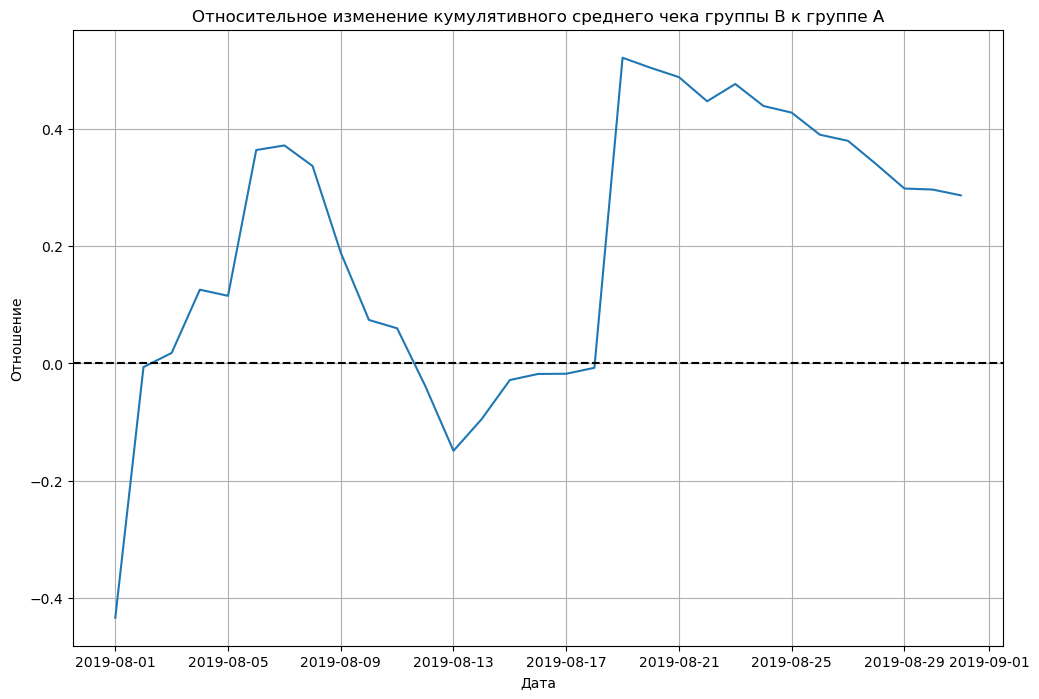

In [39]:
# зададим размеры графика  
plt.figure(figsize=(12,8))   
# cтроим отношение средних чеков
plt.plot(
    merged_revenue['date'],
    (merged_revenue['revenue_b']/
     merged_revenue['orders_b'])/
    (merged_revenue['revenue_a']/
     merged_revenue['orders_a'])
    -1
)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')  
# зададим описание графика 
plt.xlabel('Дата')
plt.ylabel('Отношение') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.grid()
plt.show()  

На графике видим резкие скачки: были сделаны анамально дорогие заказы.

Построение графика кумулятивного среднего количество заказов на посетителя по группам.

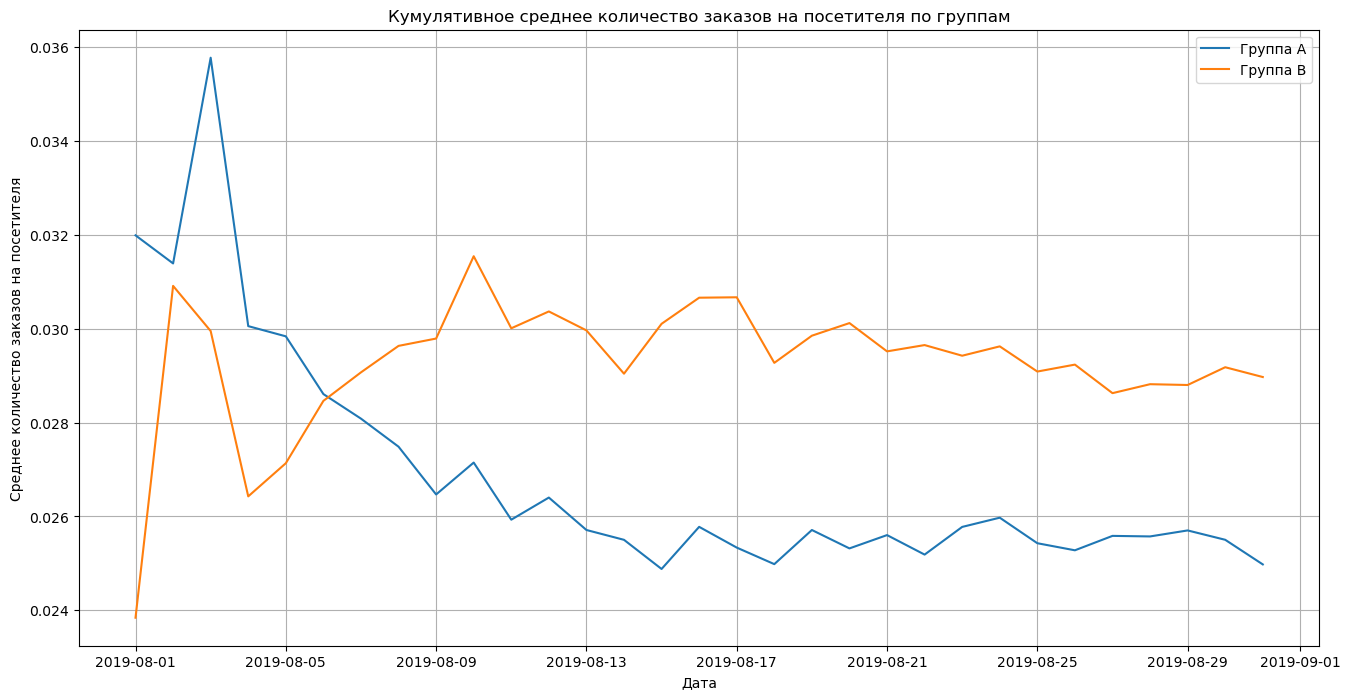

In [40]:
# считаем кумулятивное среднее количество заказов на посетителя
cumulative_df['ord_visit'] = cumulative_df['orders']/cumulative_df['visitors']

# отделяем данные по группе A
cumulative_df_a = cumulative_df[cumulative_df['group']=='A']

# отделяем данные по группе B
cumulative_df_b = cumulative_df[cumulative_df['group']=='B']

# зададим размеры графика  
plt.figure(figsize=(16,8))   

# строим графики
plt.plot(cumulative_df_a['date'], cumulative_df_a['ord_visit'], label='A')
plt.plot(cumulative_df_b['date'], cumulative_df_b['ord_visit'], label='B')


# зададим описание графика
plt.legend(['Группа А', 'Группа B']) 
# задаем масштаб осей
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя') 
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.grid()
plt.show()  

На грфике видим, что в первые дни кумулятивное среднее количество заказов на посетителя по группам у группы А была выше, чем у В, но спустя 6 дней со времени запуска теста, на затем:

    для А показатель держался на уровне от 0.029 до 0.031,
    для B от 0.034 до 0.036

Но уже к концу первой недели тестирования показатели группы В выросли, а группы А снизились, после чего графики начали стремиться к стабилизации. Далее колебания сглаживаются. Показатель группы В стабильно лучше по накопленным показателям чем A.


Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

Для построения графиков сначала объеденим таблицы.

In [41]:
#объеденим по столбцу с датой и зададим суффиксы для каждый группы  
merged_ord_visit = cumulative_df_a[['date','ord_visit']].merge(
    cumulative_df_b[['date','ord_visit']], 
    left_on='date',
    right_on='date', 
    how='left',
    suffixes=['_a', '_b']
)
#выведем таблицу 
merged_ord_visit.head()

,date,ord_visit_a,ord_visit_b
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


 Построим график.


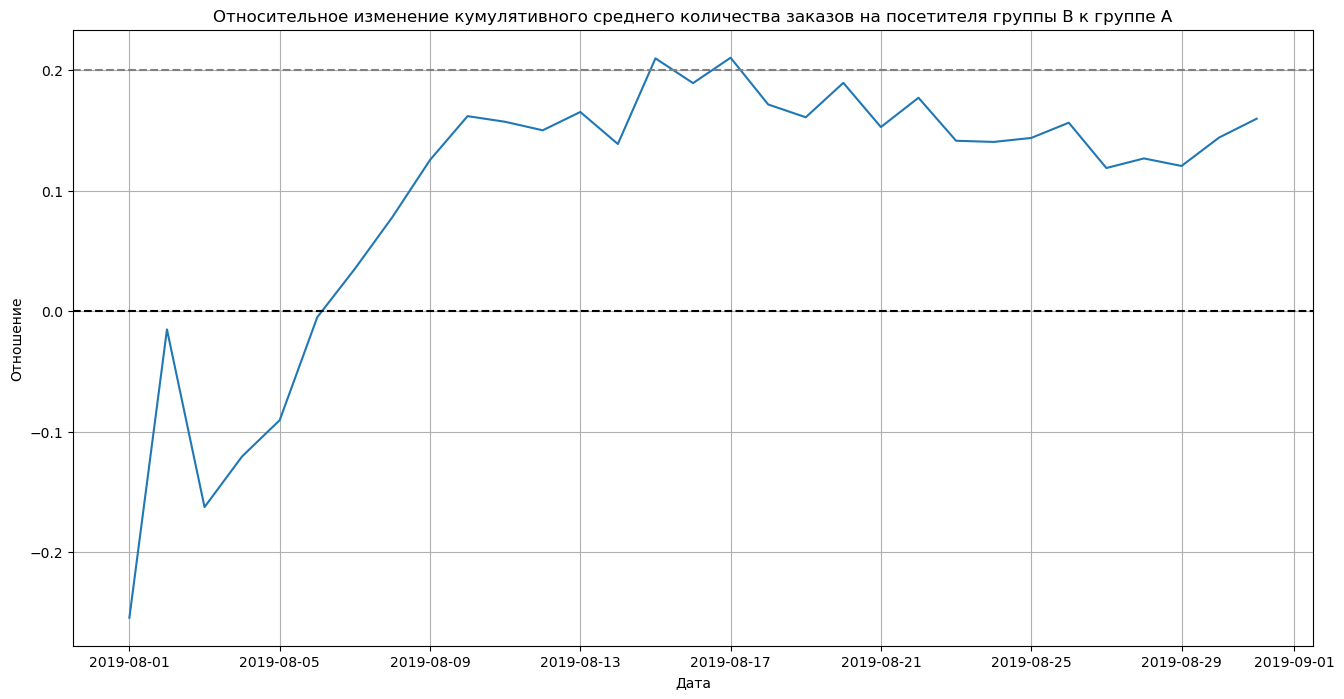

In [42]:
# зададим размеры графика  
plt.figure(figsize=(16,8))   

plt.plot(merged_ord_visit['date'],
         merged_ord_visit['ord_visit_b']/
         merged_ord_visit['ord_visit_a']-1,
        )
# добавляем ось X c нулевым приростом и отметку в 20% 
plt.axhline(y=0, color='black', linestyle='--')  
plt.axhline(y=0.2, color='grey', linestyle='--') 
# зададим описание графика 
plt.ylabel('Отношение') 
plt.xlabel('Дата') 
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A') 
plt.grid()
plt.show()

Анализ показал в начале теста щтносительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A показывало не стабильные результаты, сначала резко поднимаясь, а потом опускалась, но на 6й день теста, получили стабильный прирост, который привысил 20% и установился в пределах от 10 до 15 % к концу периода.

Построение точечного графика количества заказов по пользователям

Для построения графика создадим сводную таблицу с колличеством заказов по каждому пользователю:

In [43]:
#создадим сводную таблицу с кол-вом закзазов для каждого пользователя 
orders_count = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
#переименуем столбуы 
orders_count.columns = ['user_id', 'orders']
#выведем таблицу отсортиованную по убыванию кол-ва заказов 
orders_count.sort_values(by='orders', ascending=False).head(10) 

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


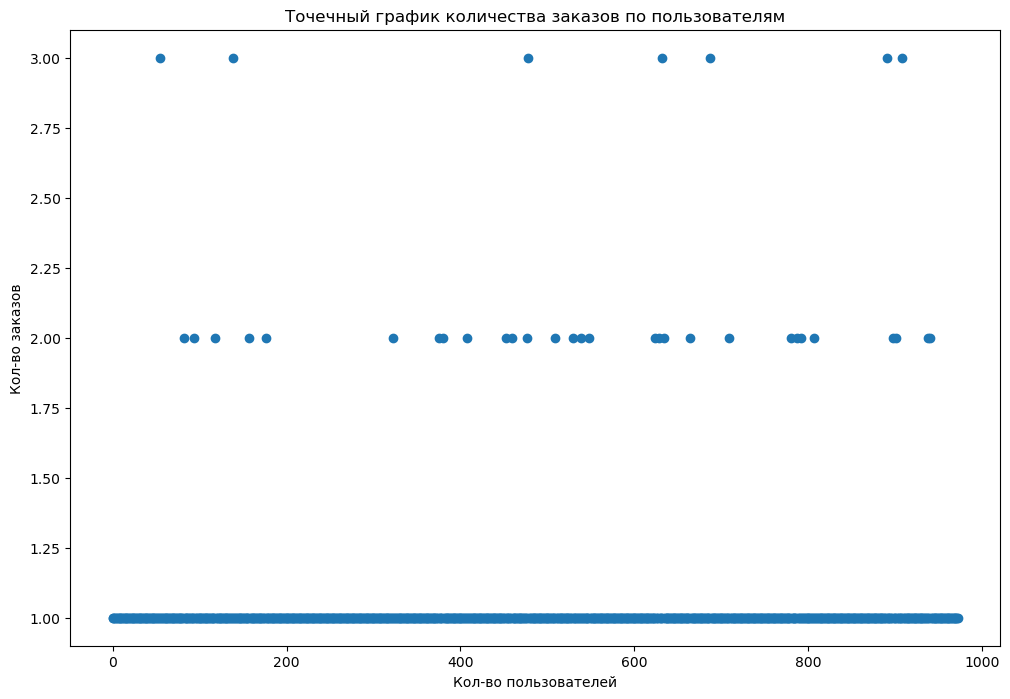

In [44]:
# серия из чисел от 0 до количества наблюдений в orders_count 
x_values = pd.Series(range(0, len(orders_count)))
# зададим размеры графика  
plt.figure(figsize=(12,8)) 
#построим график 
plt.scatter(x_values, orders_count['orders'])  
# зададим описание графика 
plt.ylabel('Кол-во заказов') 
plt.xlabel('Кол-во пользователей') 
plt.title('Точечный график количества заказов по пользователям') 
plt.show() 

Анализ показал, что больше всего пользователей с 1м или 2мя заказами, остальные довольно редкие, от 3х до 5 ти заказов уже можно посчитать на взгляд по кол-ву точек на графике, но есть уникальные, которые сделали до 11 заказов за период исследования.

Наверняка, на сайте есть очень активные и постоянные пользователи - это не ошибка в данных, но для создания объективного представления такие значения будут удалены.

Подсчёт 95-й и 99-й перцентили количества заказов на пользователя. Опредления границы для аномальных пользователей

In [45]:
print(np.percentile(orders_count['orders'], [95, 99]))

[1. 2.]


In [46]:
np.percentile(orders['revenue'], [95])

array([26785.])

Установим границу по колличеству заказов на пользователя на уровне 95 персентиля.

In [47]:
too_much_orders = np.percentile(orders_count['orders'], 95)

Построение точечного графика стоимостей заказов

In [48]:
orders[['visitor_id', 'revenue']].sort_values(by='revenue', ascending=False).head(10) 

,visitor_id,revenue
425,1920142716,1294500
1196,2108080724,202740
1136,1307669133,92550
744,888512513,86620
743,4133034833,67990
1103,1164614297,66350
1099,148427295,65710
949,887908475,60450
940,4003628586,58550
131,2254586615,53904


Посмотрим на распредление по неочищенным данным:

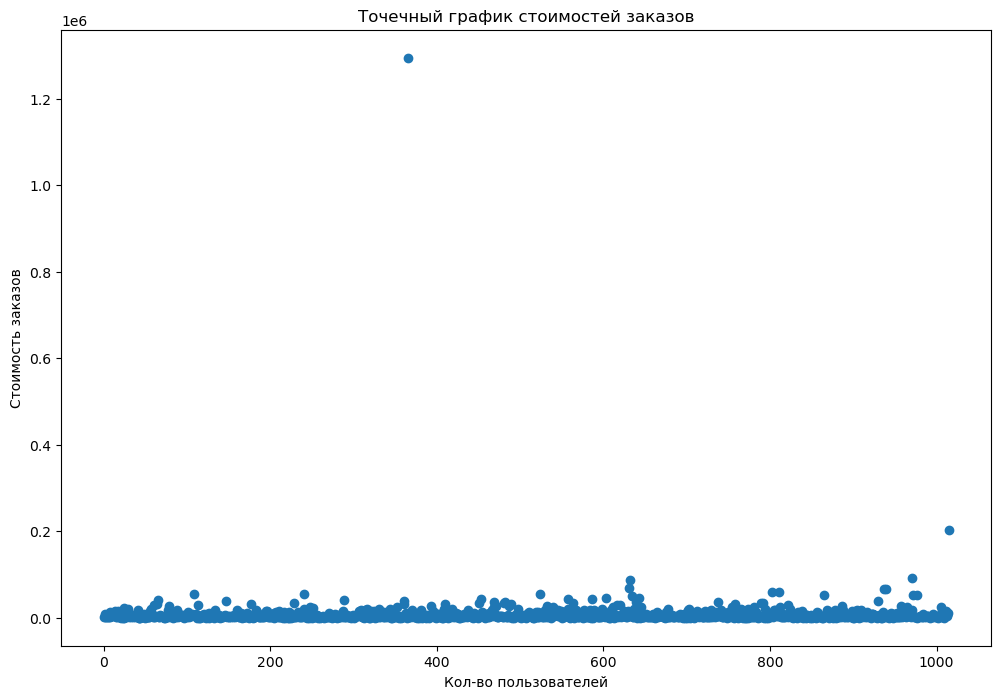

In [49]:
# серия из чисел от 0 до количества наблюдений в orders 
x_values = pd.Series(range(0, len(orders['revenue'])))
# зададим размеры графика  
plt.figure(figsize=(12,8)) 
#построим график 
scattter_plot = plt.scatter(x_values, orders['revenue'])  
# зададим описание графика 
plt.ylabel('Стоимость заказов') 
plt.xlabel('Кол-во пользователей') 
plt.title('Точечный график стоимостей заказов') 
plt.show() 

Максимальное значения сильно превосходит остальные. Заказы на 200 тысяч и миллинон - очевидно будут сильно выбиваться. Зададим лимит в 100 000, что бы подробнее изучить распредление наиболее частых заказов.

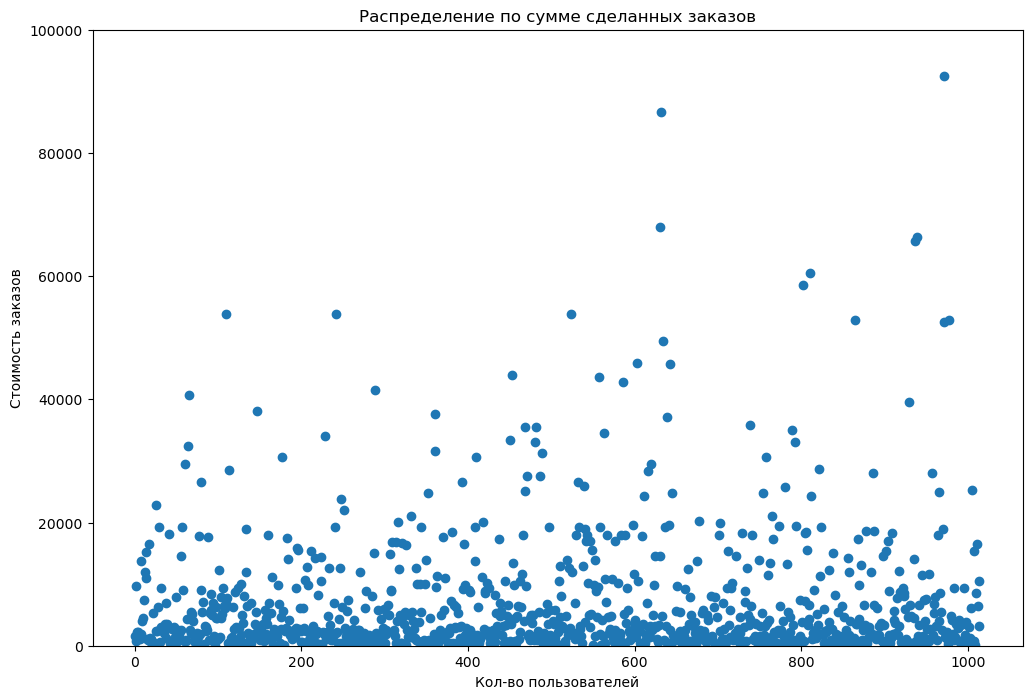

In [50]:
# серия из чисел от 0 до количества наблюдений в orders 
x_values = pd.Series(range(0, len(orders['revenue'])))
# зададим размеры графика  
plt.figure(figsize=(12,8))
#построим график 
plt.scatter(x_values, orders['revenue'])
#срежем очевидно анамальные заказы 
plt.ylim(0, 100000) 
# зададим описание графика 
plt.ylabel('Стоимость заказов') 
plt.xlabel('Кол-во пользователей') 
plt.title('Распределение по сумме сделанных заказов') 
plt.show()  

Основные значения лежат в пределах до примерно 20000, по графику всё ещё сложно оценить границу анамально большого заказа, посчитаем перцентили.

Подсчёт 95-й и 99-й перцентили стоимости заказа. Опредления границы для аномальных заказов

In [51]:
print(np.percentile(orders['revenue'], [95, 99]))  

[26785. 53904.]


В итоге:

    не более 5 % заказов стомостью более 26785 рублей
    не более 1 % заказов стомостью более 53904 рублей

Установим границу по сумме заказа на уровне 95 персентиля.

In [52]:
too_expensive_order  = np.percentile(orders['revenue'], 95)

Подсчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Статистическую значимость различий посчитаем с помощью теста Манна-Уитни.

Перед применением теста Манна-Уитни проверим гипотезу о нормальном распределении с помощью критерия Шапиро-Уилка:

1. H0:Различия в среднем количестве заказов на посетителя  группы A распределены нормально 
2. H1:Различия в среднем количестве заказов на посетителя группы A не распределены нормально

α=5% критический уровень статистической значимости.

Аналогично для группы B.

In [53]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

 #для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

# пользователям с заказами будет соответствовать число заказов пользователя, а пользователям без заказов — нули
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

# зададим уровень значимости 5%
alpha=0.05
p=stats.shapiro(sampleA)
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % p)
if p[1] > alpha:
    print('Принять гипотезу о нормальности распределении группа А')
else:
    print('Отклонить гипотезу о нормальности распределении группа А')
    
p=stats.shapiro(sampleB)
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % p)
if p[1] > alpha:
    print('Принять гипотезу о нормальности распределении группа В')
else:
    print('Отклонить гипотезу о нормальности распределении группа В')

Shapiro-Wilk normality test, W-statistic: 0.132646, p-value: 0.000000
Отклонить гипотезу о нормальности распределении группа А
Shapiro-Wilk normality test, W-statistic: 0.150587, p-value: 0.000000
Отклонить гипотезу о нормальности распределении группа В


C:\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Данные в обоих группах не подходят под нормальное распределение, поэтому воспользуемся U-критерием Манна — Уитни.

In [54]:
# таблицы с данными по заказам на каждого пользователя
orders_by_users_a = orders[orders['group']=='A'].groupby('visitor_id')['transaction_id'].nunique().reset_index()
orders_by_users_a.columns=['visitors_id','orders']

orders_by_users_b = orders[orders['group']=='B'].groupby('visitor_id')['transaction_id'].nunique().reset_index()
orders_by_users_b.columns=['visitors_id','orders'] 

display(orders_by_users_a.head()) 
display(orders_by_users_b.head()) 

,visitors_id,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


,visitors_id,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


Объявим переменные, в которых пользователям с заказами будет соответствовать число заказов пользователя, пользователям без заказов — нули.

In [55]:
sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(0, 
                  index=np.arange
                  (visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a['orders'])
                  ),
                  name='orders'
                 )
    ],
    axis=0)
sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series
        (0,
         index=np.arange(
             visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b['orders'])
         ),
         name='orders'
        )
    ],
    axis=0)

Данные для проведения теста Манна-Уитни подготовлены, сформируем нулевую и альетрнативную гипотезы:

Нулевая гипотеза: различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет

Альтернативная гипотеза: различия в среднем количестве заказов на посетителя между группами по «сырым» данным между группами есть

Коэффициент альфа: 0.05

In [56]:
result_1 = stats.mannwhitneyu(sample_a, sample_b)[1] 
#задаим значение aplha
alpha = 0.05
#введем значение p-value
print(f'Значение p-value : {result_1}')
# условный оператор с выводом строки с ответом
if result_1 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
print('Среднее количество заказов на посетителя группы А: {:.1%}'.format(sample_a.mean()))
print('Среднее количество заказов на посетителя группы B: {:.1%}'.format(sample_b.mean()))  
print('Отношение количества заказов на посетителя группы В к А: {0:.3f}'.format(sample_b.mean()/sample_a.mean()-1))  

Значение p-value : 0.011018084110014696
Отвергаем нулевую гипотезу
Среднее количество заказов на посетителя группы А: 2.5%
Среднее количество заказов на посетителя группы B: 2.9%
Отношение количества заказов на посетителя группы В к А: 0.160


Результат р-value меньше заданного значения alpha - отвергаем нулевую гипотезу, значит различия в количестве заказов на посетителя есть. Относительный проигрыш группы A составляет 16%

Подсчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы:

Нулевая гипотеза: различий в средних чеках между группами нет

Альтернативная гипотеза: различия в средних чеках между группами есть

Коэффициент альфа: 0.05

In [57]:
result_2 = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]  
#введем значение p-value
print(f'Значение p-value : {result_2}')
# условный оператор с выводом строки с ответом
if result_2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
#выведем основные показатели
print('Средний чек группы А: {:.2f}'.format(orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean())) 
print('Отношение среднего  чека В к А: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean())) 

Значение p-value : 0.8294908998149533
Не получилось отвергнуть нулевую гипотезу
Средний чек группы А: 7189.44
Средний чек группы B: 9249.95
Отношение среднего  чека В к А: 1.29


Результат р-value значительно больше alpha, значит принимаем нулевую гипотезу - статичстичкой значимости различий в средних чеках нет. При этом средний чек группы B значительно выше чем у А, почти на 29%, но тут свою роль могли сыграть выбросы, проверим это далее на очищенных данных.

Подсчёт статистической значимости различий в конверсии между группами по «очищенным» данным

Ранее изучено распредление заказов по кол-ву для пользователя и сумме, определены следующие ограничения:

    кол-во > 95 персентиля, перемиенная too_much_orders
    сумма > 95 персентиля, переменная too_expensive_order

Посмотрим, сколько в датафрейме анамальных пользователей:

In [58]:
# собираем пользователей с большим кол-вом заказов 
many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > too_much_orders]['visitors_id'],
        orders_by_users_b[orders_by_users_b['orders'] > too_much_orders]['visitors_id'],
    ],
    axis=0,
)

# собираем пользователей с слишком дорогими заказами
expensive_orders = orders[orders['revenue'] > too_expensive_order]['visitor_id']

# объединяем всё в один датафрейм 
abnormal_users = (
    pd.concat([many_orders, expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))
print(' ')
print('Кол-во анамальных пользователей: ', abnormal_users.shape[0])

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
 
Кол-во анамальных пользователей:  86


Оценим потери в относительном выражении. Посчитаем отношение количества аномальных пользователей к общему количеству пользователей.

In [59]:
print('Относительные потери %: {:.2f}'.format(abnormal_users.count()/orders['visitor_id'].count()*100))

Относительные потери %: 8.46


Исключим аномалии.

In [60]:
#отфильтруем данные в группе А 
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitors_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#отфильтруем данные в группе В
sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitors_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)  

In [61]:
result_3 = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1] 
#ведем значение pvalue
print(f'Значение p-value : {result_3}') 
# условный оператор с выводом строки с ответом
if result_3 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('Среднее количество заказов на посетителя (очищенное) группы А: {:.1%}'.format(sample_a_filtered.mean()))
print('Средняя количество заказов на посетителя (очищенное) группы B: {:.1%}'.format(sample_b_filtered.mean())) 
print('Отношение количества заказов на посетителя В к А, по очищенным данным: {0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))  

Значение p-value : 0.01593020716573973
Отвергаем нулевую гипотезу
Среднее количество заказов на посетителя (очищенное) группы А: 2.2%
Средняя количество заказов на посетителя (очищенное) группы B: 2.5%
Отношение количества заказов на посетителя В к А, по очищенным данным: 0.174


По результатам для "очищенных" данных также верно утверждение о том, что количество заказов на посетителя по очищенным данным  разное и нулевая гипотеза верна. Проигрыш группы A на очищенных данных совсем немного увеличился на 0.001.

Подсчёт статистической значимости различий в различий в среднем чеке заказа по «очищенным» данным

Для "сырых" данных не была опровергнута нулевая гипотеза. Посмотрим будут ли статистически равны  "очищенные" данные.

In [62]:
result4 = stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1] 

#посчитаем среднием значения 
mean_revenue_b = orders[np.logical_and(orders['group']=='B',
                                       np.logical_not(orders['visitor_id'].
                                                      isin(abnormal_users)))]['revenue'].mean()
mean_revenue_a = orders[np.logical_and(orders['group']=='A',
                                       np.logical_not(orders['visitor_id'].
                                                      isin(abnormal_users)))]['revenue'].mean() 

print(f'Значение p-value : {result4}')  
# условный оператор с выводом строки с ответом
if result4 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
#выведем всю необходимую информацию
print('Средний чек группы А (очищенная): {:.1f}'.format(mean_revenue_b))
print('Средний чекгруппы B (очищенная): {:.1f}'.format(mean_revenue_a))
print('Отношение среднего чека В к А, по очищенным данным: {0:.2f}'.format(mean_revenue_b / mean_revenue_a)) 

Значение p-value : 0.7271286894009963
Не получилось отвергнуть нулевую гипотезу
Средний чек группы А (очищенная): 4876.3
Средний чекгруппы B (очищенная): 5046.5
Отношение среднего чека В к А, по очищенным данным: 0.97


Для "очищенных" данных статистическая занчимость средних чеков группы B и A, также равны, но стоит заметить, что абсолютные значения практически выровнились, отношение конверсии В к А близко к единице. Это еще раз заставляет убедиться, что статистически значимых различий по этой метрике между группами нет, а наблюдаемая на неочищенных данных разница  была связана с выбросами. 


Решение

Статистические факты:
График относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А, сообщает, что результаты группы В лучше группы А. 

Данные стабилизировались возле среднего значения.

График относительного изменения кумулятивного среднего чека группы В к группе А колеблется и позволил выявить аномилии в данных. Сделать из этого графика определенные выводы нельзя.

Есть статистически значимое различие по кумулятивному среднему количеству заказов на посетителя между группами, как по сырым так и по отфильтрованным данным.

По сырым  и очищенным данным нет статистически значимого различия по среднему чеку между группами.

 
Тест необходимо остановить,признать победу группы Б.

Поскольку отсутствие значимых различий между группами - тоже результат и продолжать тест не имеет смысла. Так же группа по графикам В выделяется по показателям от группы А по изменению кумулятивного среднего количества заказов на посетителя группы В к группе А, сообщает, что результаты группы В лучше группы А. 
 